In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
# prepare data:
# each node is pair of countries, order matters so AB and BA are two different nodes
# edges are based on similarity
# node features are the concatenated features of the country pairs (in the correct order)
# build such a graph for each year separately
feature_data = pd.read_csv('../data/features/features_interpolated.csv', encoding='latin-1', engine='python')
feature_data.drop(columns=['Unnamed: 0'], inplace=True)
migration_data = pd.read_csv('../data/labels/OECD_acquisition_data_interpolated.csv', encoding='latin-1', engine='python')
migration_data.drop(columns=['Unnamed: 0'], inplace=True)

features_per_country = feature_data.columns[2:]
years = migration_data['Year'].unique()
countries = migration_data['CO2'].unique()

merged_data = pd.merge(feature_data, migration_data, left_on=["Country", "Year"], right_on=["COU", "Year"])

# Merge the third dataset based on country and year
merged_data = pd.merge(feature_data, merged_data, left_on=["Country", "Year"], right_on=["CO2", "Year"])

merged_data.drop(columns=["COU", "CO2"], inplace=True)

label_column = "y"
merged_data.rename(columns={"Value": "y"}, inplace=True)
merged_data

,Country_x,Year,Carbon Emissions_x,Education Expenditure_x,Foreign Direct Investment (FDI) Inflows_x,GDP_x,Health Expenditure_x,Inflation Rate_x,Internet Penetration_x,Life Expectancy_x,...,Education Expenditure_y,Foreign Direct Investment (FDI) Inflows_y,GDP_y,Health Expenditure_y,Inflation Rate_y,Internet Penetration_y,Life Expectancy_y,Renewable Energy Production_y,Unemployment Rate_y,y
0,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,...,5.58881,8.501013e+09,1.972896e+11,9.203713,2.344863,33.730133,78.126829,26.44,4.69,9.0
1,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,...,5.79586,8.873871e+10,2.367925e+11,7.999176,2.544518,29.431692,77.721951,1.44,6.59,17.0
2,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,...,5.42332,6.830335e+10,7.447734e+11,8.248144,2.719440,51.300000,79.166829,22.04,6.83,150.0
3,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,...,4.64837,2.308088e+10,2.792160e+11,9.114019,1.558529,47.100000,79.680488,18.19,2.66,64.0
4,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,...,3.77583,4.860016e+09,7.824988e+10,7.035177,3.843273,16.600000,76.870000,31.36,10.49,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,USA,2020,4817719.0,6.05000,1.489120e+11,2.106047e+13,18.815826,1.233584,90.620470,76.980488,...,5.90000,-4.102660e+09,3.621983e+11,11.417550,1.286585,97.000001,83.209756,62.37,4.42,243.0
14738,USA,2020,4817719.0,6.05000,1.489120e+11,2.106047e+13,18.815826,1.233584,90.620470,76.980488,...,5.98000,4.135120e+09,2.117345e+11,10.028587,1.714562,92.865074,82.256098,29.65,4.60,577.0
14739,USA,2020,4817719.0,6.05000,1.489120e+11,2.106047e+13,18.815826,1.233584,90.620470,76.980488,...,5.19000,1.915100e+10,5.994492e+11,6.493102,3.374470,83.184887,76.500000,12.18,3.16,15.0
14740,USA,2020,4817719.0,6.05000,1.489120e+11,2.106047e+13,18.815826,1.233584,90.620470,76.980488,...,5.76000,5.062695e+08,5.370680e+10,9.453579,-0.054857,86.601301,80.531707,20.86,4.97,1.0


In [20]:
per_year_df = merged_data[merged_data["Year"] == 2000]

In [44]:

cols_to_skip = ["Country_x", "Country_y", "Year", "y"]
cols_to_norm = list(set(merged_data.columns).difference(set(cols_to_skip)))

# normalize data
merged_data[cols_to_norm] = (merged_data[cols_to_norm]-merged_data[cols_to_norm].mean())/merged_data[cols_to_norm].std()
merged_data

,Country_x,Year,Carbon Emissions_x,Education Expenditure_x,Foreign Direct Investment (FDI) Inflows_x,GDP_x,Health Expenditure_x,Inflation Rate_x,Internet Penetration_x,Life Expectancy_x,...,Education Expenditure_y,Foreign Direct Investment (FDI) Inflows_y,GDP_y,Health Expenditure_y,Inflation Rate_y,Internet Penetration_y,Life Expectancy_y,Renewable Energy Production_y,Unemployment Rate_y,y
0,AUS,2000,-0.034998,-0.454657,-0.289280,-0.298431,-0.607745,1.153977,-0.938189,-0.116250,...,0.174311,-0.368066,-0.371296,0.147570,0.054876,-1.501728,-0.518563,0.333188,-0.646840,9.0
1,AUS,2000,-0.034998,-0.454657,-0.289280,-0.298431,-0.607745,1.153977,-0.938189,-0.116250,...,0.359953,0.620936,-0.358126,-0.419606,0.158750,-1.687690,-0.665665,-1.111867,-0.175451,17.0
2,AUS,2000,-0.034998,-0.454657,-0.289280,-0.298431,-0.607745,1.153977,-0.938189,-0.116250,...,0.025932,0.369052,-0.188773,-0.302375,0.249756,-0.741608,-0.140708,0.078859,-0.115907,150.0
3,AUS,2000,-0.034998,-0.454657,-0.289280,-0.298431,-0.607745,1.153977,-0.938189,-0.116250,...,-0.668892,-0.188356,-0.343983,0.105336,-0.354227,-0.923311,0.045915,-0.143680,-1.150481,64.0
4,AUS,2000,-0.034998,-0.454657,-0.289280,-0.298431,-0.607745,1.153977,-0.938189,-0.116250,...,-1.451215,-0.412945,-0.410982,-0.873520,0.834449,-2.242824,-0.975198,0.617575,0.792136,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,USA,2020,4.487322,0.587816,1.362627,6.584184,4.673587,-0.523285,0.959502,-0.935055,...,0.453325,-0.523418,-0.316318,1.189990,-0.495711,1.235498,1.328177,2.410022,-0.713827,243.0
14738,USA,2020,4.487322,0.587816,1.362627,6.584184,4.673587,-0.523285,0.959502,-0.935055,...,0.525054,-0.421880,-0.366480,0.535975,-0.273049,1.056610,0.981692,0.518734,-0.669169,577.0
14739,USA,2020,4.487322,0.587816,1.362627,6.584184,4.673587,-0.523285,0.959502,-0.935055,...,-0.183264,-0.236796,-0.237222,-1.128765,0.590546,0.637819,-1.109627,-0.491071,-1.026432,15.0
14740,USA,2020,4.487322,0.587816,1.362627,6.584184,4.673587,-0.523285,0.959502,-0.935055,...,0.327801,-0.466609,-0.419164,0.265223,-1.193618,0.785622,0.355182,0.010652,-0.577372,1.0


In [77]:
from tqdm import tqdm
import networkx as nx
from sklearn.neighbors import NearestNeighbors, KDTree

graphs=[]
k = 30

# for each year create the graph
for year in tqdm(years):
    # empty graph
    graph = nx.Graph()

    per_year_df = merged_data[merged_data['Year'] == year].reset_index(drop=True)
    # Create a NearestNeighbors model
    neighbors = KDTree(per_year_df[cols_to_norm], metric='euclidean')

    indices = neighbors.query_radius(per_year_df[cols_to_norm], r=1.5)

    for i, row in per_year_df.iterrows():
        graph.add_node(row['Country_x']+"_"+row['Country_y'], x=row[cols_to_norm], y=row[label_column])
    for i, jx in enumerate(indices):
        src_node = per_year_df.iloc[i]['Country_x']+"_"+per_year_df.iloc[i]['Country_y']
        for j in indices[i]:
            tar_node = per_year_df.iloc[j]['Country_x']+"_"+per_year_df.iloc[j]['Country_y']
            graph.add_edge(src_node, tar_node)
    graph.remove_edges_from(list(nx.selfloop_edges(graph)))
    graphs.append(graph)

100%|██████████| 21/21 [00:17<00:00,  1.20it/s]


In [115]:
from torch_geometric.utils.convert import from_networkx
data_graphs = [from_networkx(graphs[i]) for i in range(len(graphs))]
for i in range(len(data_graphs)):
    data_graphs[i].y = data_graphs[i].y.reshape(-1, 1)
data_graphs[0]

Data(x=[702, 20], edge_index=[2, 900], y=[702, 1])

In [116]:
train_data = data_graphs[:17]
test_data = data_graphs[17:]

In [117]:
import time
import torch
import pickle
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch_geometric.nn import TAGConv, GATv2Conv
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.loader import DataLoader as pyg_DataLoader



class GNN_Example(nn.Module):
  """
    This class defines a PyTorch module that takes in a graph represented in the PyTorch Geometric Data format,
    and outputs a tensor of predictions for each node in the graph. The model consists of one or more TAGConv layers,
    which are a type of graph convolutional layer.

    Args:
        node_dim (int): The number of node inputs.
        edge_dim (int): The number of edge inputs.
        output_dim (int, optional): The number of outputs (default: 1).
        hidden_dim (int, optional): The number of hidden units in each GNN layer (default: 50).
        n_gnn_layers (int, optional): The number of GNN layers in the model (default: 1).
        K (int, optional): The number of hops in the neighbourhood for each GNN layer (default: 2).
        dropout_rate (float, optional): The dropout rate to be applied to the output of each GNN layer (default: 0).

    """
  def __init__(self, node_dim, output_dim=1, hidden_dim=50, n_gnn_layers=1, K=2, dropout_rate=0):
    super().__init__()
    self.node_dim = node_dim
    self.output_dim = output_dim
    self.hidden_dim = hidden_dim
    self.n_gnn_layers = n_gnn_layers
    self.K = K
    self.dropout_rate = dropout_rate

    self.convs = nn.ModuleList()

    if n_gnn_layers == 1:
      self.convs.append(TAGConv(node_dim, output_dim, K=K))
    else:
      self.convs.append(TAGConv(node_dim, hidden_dim, K=K))

      for l in range(n_gnn_layers-2):
          self.convs.append(TAGConv(hidden_dim, hidden_dim, K=K))

      self.convs.append(TAGConv(hidden_dim, output_dim, K=K))

  def forward(self, data):
      """Applies the GNN to the input graph.

        Args:
            data (Data): A PyTorch Geometric Data object representing the input graph.

        Returns:
            torch.Tensor: The output tensor of the GNN.

        """
      x = data.x
      edge_index = data.edge_index

      for i in range(len(self.convs)-1):
          x = self.convs[i](x=x, edge_index=edge_index)
          x = nn.Dropout(self.dropout_rate, inplace=False)(x)
          x = nn.PReLU()(x)

      x = self.convs[-1](x=x, edge_index=edge_index)
      # x = nn.Sigmoid()(x)

      return x

In [118]:
# Set model parameters
node_dim = train_data[0].x.shape[1]
output_dim = 1
hidden_dim = 32
n_gnn_layers = 3
K=1
dropout_rate = 0

# Create model
model = GNN_Example(node_dim, output_dim, hidden_dim, n_gnn_layers, K, dropout_rate)
print(model)

GNN_Example(
  (convs): ModuleList(
    (0): TAGConv(20, 32, K=1)
    (1): TAGConv(32, 32, K=1)
    (2): TAGConv(32, 1, K=1)
  )
)


In [119]:
def train_epoch(model, loader, optimizer, criterion, device='cpu'):
    """
    Trains a neural network model for one epoch using the specified data loader and optimizer.

    Args:
        model (nn.Module): The neural network model to be trained.
        loader (DataLoader): The PyTorch Geometric DataLoader containing the training data.
        optimizer (torch.optim.Optimizer): The PyTorch optimizer used for training the model.
        device (str): The device used for training the model (default: 'cpu').

    Returns:
        float: The mean loss value over all the batches in the DataLoader.

    """
    model.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()  # Clear gradients.
        out = model(batch)  # Perform a single forward pass.
        loss = criterion(out, batch.y)  # Compute the loss solely based on the training nodes.
        total_loss += loss
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
    return total_loss / len(loader)

In [120]:
def evaluate_epoch(model, loader, criterion, device='cpu'):
    """
    Evaluates the performance of a trained neural network model on a dataset using the specified data loader.

    Args:
        model (nn.Module): The trained neural network model to be evaluated.
        loader (DataLoader): The PyTorch Geometric DataLoader containing the evaluation data.
        device (str): The device used for evaluating the model (default: 'cpu').

    Returns:
        float: The mean loss value over all the batches in the DataLoader.

    """
    model.eval()
    total_loss = 0
    for batch in loader:
        out = model(batch)
        loss = criterion(out, batch.y)
        total_loss += loss
    return total_loss / len(loader)

In [121]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [122]:
# Set training parameters
learning_rate = 0.001
batch_size = 4
num_epochs = 1000

# Create the optimizer to train the neural network via back-propagation
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Create the training and validation dataloaders to "feed" data to the GNN in batches
tra_loader = pyg_DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = pyg_DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [125]:
#create vectors for the training and validation loss
train_losses = []
val_losses = []

#start measuring time
start_time = time.time()

for epoch in range(1, num_epochs+1):
    # Model training
    train_loss = train_epoch(model, tra_loader, optimizer, criterion, device=device)

    # Model validation
    val_loss = evaluate_epoch(model, val_loader, criterion, device=device)

    train_losses.append(train_loss.detach().numpy())
    val_losses.append(val_loss.detach().numpy())

    if epoch%10 == 0:
        print("epoch:",epoch, "\t training loss:", np.round(train_loss.detach().cpu().numpy(),4),
                            "\t validation loss:", np.round(val_loss.detach().cpu().numpy(),4))

elapsed_time = time.time() - start_time
print(f'Model training took {elapsed_time:.3f} seconds')

epoch: 10 	 training loss: 15072267.0 	 validation loss: 17505516.0
epoch: 20 	 training loss: 15323292.0 	 validation loss: 17500004.0
epoch: 30 	 training loss: 14987682.0 	 validation loss: 17481820.0
epoch: 40 	 training loss: 15395078.0 	 validation loss: 17471216.0
epoch: 50 	 training loss: 15352624.0 	 validation loss: 17448624.0
epoch: 60 	 training loss: 24235764.0 	 validation loss: 17430632.0
epoch: 70 	 training loss: 16090450.0 	 validation loss: 17389442.0
epoch: 80 	 training loss: 15619523.0 	 validation loss: 17405098.0
epoch: 90 	 training loss: 24041820.0 	 validation loss: 17405642.0
epoch: 100 	 training loss: 20632924.0 	 validation loss: 17379202.0
epoch: 110 	 training loss: 15758421.0 	 validation loss: 17346038.0
epoch: 120 	 training loss: 15034194.0 	 validation loss: 17317984.0
epoch: 130 	 training loss: 14310498.0 	 validation loss: 17274398.0
epoch: 140 	 training loss: 15296563.0 	 validation loss: 17283524.0
epoch: 150 	 training loss: 14879307.0 	 va

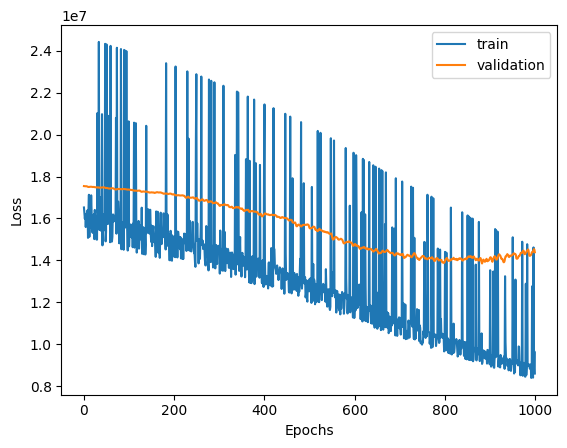

In [126]:
# plot the training and validation loss curves
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()